In [1]:
#importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
dataset = pd.read_csv('Crimes_2001_to_2022.csv',low_memory=False)
 
dataset.head(10)

# dataset.dtypes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,9/5/2015 13:00,025XX W CERMAK RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,6,1159734.0,1889313.0,2015,9/17/2015 11:37,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,9/5/2015 11:30,031XX W WASHINGTON BLVD,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,3,1155536.0,1900515.0,2015,2/10/2018 15:50,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,5/1/2016 0:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,4/6/2019 16:04,NaN,NaN,NaN


In [3]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['ID','Case Number','Description','Updated On','Block'])
# X.shape

print('Columns in dataset: ', dataset.columns)


dataset.shape


Columns in dataset:  Index(['Date', 'IUCR', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


(1048575, 17)

In [4]:
# droping the null value enteries drop null 
dataset.dropna(inplace=True)
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,71.0,5,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048205,1/3/2001 6:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1141728.0,1910856.0,2001,41.911457,-87.754774,"(41.911457184, -87.75477368)"
1048464,1/29/2019 19:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1142432.0,1908180.0,2019,41.904101,-87.752254,"(41.904100882, -87.752253974)"
1048488,10/24/2019 6:36,630,BURGLARY,RESIDENTIAL YARD (FRONT/BACK),True,False,312,3.0,20.0,42.0,5,1180341.0,1863044.0,2019,41.779456,-87.614393,"(41.779455579, -87.614393194)"
1048517,5/12/2015 17:58,1153,DECEPTIVE PRACTICE,BANK,False,False,632,6.0,6.0,44.0,11,1182609.0,1847455.0,2015,41.736625,-87.606561,"(41.736625423, -87.60656135)"


In [5]:
# Before removing Null values 1048575

# After removing Null value 1015247

# Total Null values removed 33328

In [6]:
# ignore latitude and logitude outside of the chicago
dataset=dataset[(dataset["Latitude"] < 45)
             & (dataset["Latitude"] > 40)
             & (dataset["Longitude"] < -85)
             & (dataset["Longitude"] > -90)]
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,71.0,5,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048205,1/3/2001 6:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1141728.0,1910856.0,2001,41.911457,-87.754774,"(41.911457184, -87.75477368)"
1048464,1/29/2019 19:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1142432.0,1908180.0,2019,41.904101,-87.752254,"(41.904100882, -87.752253974)"
1048488,10/24/2019 6:36,630,BURGLARY,RESIDENTIAL YARD (FRONT/BACK),True,False,312,3.0,20.0,42.0,5,1180341.0,1863044.0,2019,41.779456,-87.614393,"(41.779455579, -87.614393194)"
1048517,5/12/2015 17:58,1153,DECEPTIVE PRACTICE,BANK,False,False,632,6.0,6.0,44.0,11,1182609.0,1847455.0,2015,41.736625,-87.606561,"(41.736625423, -87.60656135)"


In [7]:
# # listing the crimes category wise with their counts
types=dataset['Primary Type'].value_counts().sort_values(ascending=False)
types

THEFT                                237702
BATTERY                              190834
CRIMINAL DAMAGE                      113285
ASSAULT                               73438
OTHER OFFENSE                         67052
DECEPTIVE PRACTICE                    65914
NARCOTICS                             53286
BURGLARY                              49698
MOTOR VEHICLE THEFT                   41399
ROBBERY                               41312
CRIMINAL TRESPASS                     25787
WEAPONS VIOLATION                     17856
OFFENSE INVOLVING CHILDREN             8360
PUBLIC PEACE VIOLATION                 6253
CRIM SEXUAL ASSAULT                    5210
INTERFERENCE WITH PUBLIC OFFICER       4520
SEX OFFENSE                            3792
PROSTITUTION                           3022
ARSON                                  1642
LIQUOR LAW VIOLATION                    894
GAMBLING                                755
KIDNAPPING                              740
STALKING                        

In [8]:
# crime types according to their counts in dataframe
# 15 classes
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY','MOTOR VEHICLE THEFT'
#               ,'ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','OFFENSE INVOLVING CHILDREN','PUBLIC PEACE VIOLATION','CRIM SEXUAL ASSAULT']
# 8 classes
# storing major crime types according to their counts in dataframe
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY']

In [9]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']

In [10]:
crime_df = dataset.loc[dataset['Primary Type'] .isin(major_crimes)]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [11]:
data = crime_df.pivot_table(index='Year', columns='Primary Type', aggfunc='count')
print(data)

# since we dont have different crimes in early years so we drop data of these years

               Arrest                                       Beat           \
Primary Type  ASSAULT  BATTERY CRIMINAL DAMAGE    THEFT  ASSAULT  BATTERY   
Year                                                                        
2001              NaN      NaN             NaN      3.0      NaN      NaN   
2008              NaN      1.0             NaN      1.0      NaN      1.0   
2009              1.0      NaN             NaN      NaN      1.0      NaN   
2010              NaN      1.0             NaN      2.0      NaN      1.0   
2011              NaN      NaN             1.0      1.0      NaN      NaN   
2012              NaN      2.0             NaN      8.0      NaN      2.0   
2013              NaN      5.0             1.0     11.0      NaN      5.0   
2014              4.0     15.0             8.0     75.0      4.0     15.0   
2015           8528.0  24796.0         15503.0  30587.0   8528.0  24796.0   
2016          18060.0  49085.0         30587.0  59255.0  18060.0  49085.0   

In [12]:
# selecting the dataset which starts from 2015
crime_df=crime_df[crime_df['Year']>=2015]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [13]:
temp=crime_df.copy()
temp

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [14]:
# getting the half of our data set for random data selection
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

205039

In [15]:
first=temp.iloc[0:portion,:]
first.shape

(205039, 17)

In [16]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(205039, 17)

In [17]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape


(205039, 17)

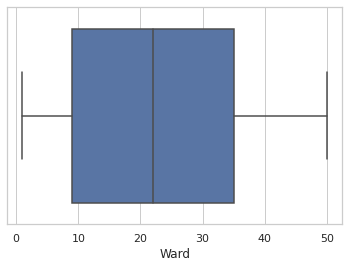

In [18]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 2000)
df_frst=first.iloc[index]
df_frst.shape
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df_frst["Ward"])

In [19]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 2000)
df_scnd=scnd.iloc[index]
df_scnd


,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
524065,6/26/2017 18:00,820,THEFT,CTA GARAGE / OTHER PROPERTY,False,False,1111,11.0,28.0,23.0,6,1149603.0,1904210.0,2017,41.893070,-87.726016,"(41.89307048, -87.726016035)"
495086,5/27/2017 17:00,890,THEFT,GROCERY FOOD STORE,False,False,2524,25.0,31.0,20.0,6,1146128.0,1918241.0,2017,41.931640,-87.738421,"(41.931639765, -87.738421102)"
602028,9/9/2017 22:32,460,BATTERY,RESIDENCE,True,False,1511,15.0,29.0,25.0,08B,1137481.0,1907004.0,2017,41.900964,-87.770469,"(41.900964384, -87.770468886)"
437214,3/3/2017 16:00,820,THEFT,STREET,False,False,1412,14.0,35.0,22.0,6,1154248.0,1917627.0,2017,41.929796,-87.708598,"(41.929796414, -87.708597684)"
359743,10/18/2016 18:15,860,THEFT,SMALL RETAIL STORE,True,False,1821,18.0,27.0,8.0,6,1173175.0,1908290.0,2016,41.903776,-87.639324,"(41.903775756, -87.639324074)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670781,2/28/2018 15:50,486,BATTERY,ALLEY,False,False,1712,17.0,39.0,13.0,08B,1152984.0,1934347.0,2018,41.975702,-87.712798,"(41.975702441, -87.712797693)"
367824,10/29/2016 8:30,820,THEFT,OTHER,False,False,1932,19.0,32.0,7.0,6,1167095.0,1916066.0,2016,41.925246,-87.661433,"(41.925246375, -87.661433463)"
452000,3/29/2017 22:50,486,BATTERY,APARTMENT,False,True,334,3.0,7.0,43.0,08B,1193479.0,1856762.0,2017,41.761906,-87.566434,"(41.761905806, -87.566433947)"
543009,11/10/2017 16:00,890,THEFT,CONVENIENCE STORE,False,False,623,6.0,17.0,44.0,6,1175093.0,1852554.0,2017,41.750789,-87.633946,"(41.750788594, -87.633945545)"


In [20]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 2000)
df_third=third.iloc[index]
df_third

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
765311,8/31/2018 12:40,890,THEFT,RESTAURANT,False,False,623,6.0,17.0,44.0,6,1176363.0,1852427.0,2018,41.750412,-87.629295,"(41.750411667, -87.629295485)"
817890,6/27/2018 0:30,051A,ASSAULT,APARTMENT,False,True,1132,11.0,24.0,29.0,04A,1148916.0,1894716.0,2018,41.867031,-87.728785,"(41.86703119, -87.728784764)"
747378,7/27/2018 0:00,1310,CRIMINAL DAMAGE,RESIDENCE-GARAGE,False,False,1624,16.0,38.0,15.0,14,1134905.0,1928213.0,2018,41.959210,-87.779428,"(41.959210275, -87.779427617)"
770045,9/6/2018 10:28,430,BATTERY,RESIDENTIAL YARD (FRONT/BACK),False,False,511,5.0,8.0,50.0,04B,1184650.0,1838451.0,2018,41.711870,-87.599365,"(41.711869874, -87.599365131)"
810029,6/17/2018 2:00,1320,CRIMINAL DAMAGE,STREET,False,False,2411,24.0,50.0,2.0,14,1156456.0,1949739.0,2018,42.017869,-87.699611,"(42.017869007, -87.699610922)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984561,2/19/2019 18:50,560,ASSAULT,SMALL RETAIL STORE,False,False,2234,22.0,34.0,75.0,08A,1170804.0,1831192.0,2019,41.692263,-87.650284,"(41.692262738, -87.650283573)"
1005601,3/24/2019 10:45,486,BATTERY,RESIDENCE,False,True,931,9.0,15.0,61.0,08B,1164851.0,1871888.0,2019,41.804066,-87.670931,"(41.80406596, -87.670931472)"
711148,4/28/2018 10:50,820,THEFT,DRUG STORE,False,False,1424,14.0,1.0,24.0,6,1165506.0,1908134.0,2018,41.903514,-87.667498,"(41.90351448, -87.667498444)"
790057,5/22/2018 14:40,560,ASSAULT,"SCHOOL, PUBLIC, BUILDING",False,False,1124,11.0,28.0,27.0,08A,1154752.0,1898890.0,2018,41.878370,-87.707248,"(41.878370307, -87.707248137)"


In [21]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,2/29/2016 8:55,1305,CRIMINAL DAMAGE,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,"(41.788339891, -87.740514226)"
1,4/21/2016 17:50,430,BATTERY,SIDEWALK,False,False,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,"(41.926484385, -87.768510133)"
2,9/9/2015 17:30,486,BATTERY,RESIDENTIAL YARD (FRONT/BACK),False,True,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,"(41.867293475, -87.711603991)"
3,11/29/2015 18:29,041A,BATTERY,SIDEWALK,False,False,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,"(41.761886136, -87.570073857)"
4,6/18/2016 14:16,1310,CRIMINAL DAMAGE,RESIDENCE-GARAGE,False,False,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,"(41.906230463, -87.730439234)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2/19/2019 18:50,560,ASSAULT,SMALL RETAIL STORE,False,False,2234,22.0,34.0,75.0,08A,1170804.0,1831192.0,2019,41.692263,-87.650284,"(41.692262738, -87.650283573)"
5996,3/24/2019 10:45,486,BATTERY,RESIDENCE,False,True,931,9.0,15.0,61.0,08B,1164851.0,1871888.0,2019,41.804066,-87.670931,"(41.80406596, -87.670931472)"
5997,4/28/2018 10:50,820,THEFT,DRUG STORE,False,False,1424,14.0,1.0,24.0,6,1165506.0,1908134.0,2018,41.903514,-87.667498,"(41.90351448, -87.667498444)"
5998,5/22/2018 14:40,560,ASSAULT,"SCHOOL, PUBLIC, BUILDING",False,False,1124,11.0,28.0,27.0,08A,1154752.0,1898890.0,2018,41.878370,-87.707248,"(41.878370307, -87.707248137)"


In [22]:
df=final_df.copy()

In [23]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,2/29/2016 8:55,1305,CRIMINAL DAMAGE,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,0.018492
1,4/21/2016 17:50,430,BATTERY,SIDEWALK,False,False,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,-0.117764
2,9/9/2015 17:30,486,BATTERY,RESIDENTIAL YARD (FRONT/BACK),False,True,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,-0.039491
3,11/29/2015 18:29,041A,BATTERY,SIDEWALK,False,False,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,0.117698
4,6/18/2016 14:16,1310,CRIMINAL DAMAGE,RESIDENCE-GARAGE,False,False,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,-0.082743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2/19/2019 18:50,560,ASSAULT,SMALL RETAIL STORE,False,False,2234,22.0,34.0,75.0,08A,1170804.0,1831192.0,2019,41.692263,-87.650284,0.144595
5996,3/24/2019 10:45,486,BATTERY,RESIDENCE,False,True,931,9.0,15.0,61.0,08B,1164851.0,1871888.0,2019,41.804066,-87.670931,0.035211
5997,4/28/2018 10:50,820,THEFT,DRUG STORE,False,False,1424,14.0,1.0,24.0,6,1165506.0,1908134.0,2018,41.903514,-87.667498,-0.052431
5998,5/22/2018 14:40,560,ASSAULT,"SCHOOL, PUBLIC, BUILDING",False,False,1124,11.0,28.0,27.0,08A,1154752.0,1898890.0,2018,41.878370,-87.707248,-0.047493


In [24]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,2016-02-29 08:55:00,1305,CRIMINAL DAMAGE,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,0.018492
1,2016-04-21 17:50:00,430,BATTERY,SIDEWALK,False,False,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,-0.117764
2,2015-09-09 17:30:00,486,BATTERY,RESIDENTIAL YARD (FRONT/BACK),False,True,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,-0.039491
3,2015-11-29 18:29:00,041A,BATTERY,SIDEWALK,False,False,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,0.117698
4,2016-06-18 14:16:00,1310,CRIMINAL DAMAGE,RESIDENCE-GARAGE,False,False,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,-0.082743
5,2016-07-24 03:00:00,486,BATTERY,RESIDENCE,False,True,2533,25.0,31.0,25.0,08B,1144273.0,1911690.0,2016,41.913698,-87.745403,-0.096066
6,2016-01-14 20:20:00,560,ASSAULT,CTA BUS STOP,False,False,422,4.0,7.0,46.0,08A,1195555.0,1852943.0,2016,41.751375,-87.558951,0.132048
7,2015-08-01 18:25:00,486,BATTERY,RESIDENTIAL YARD (FRONT/BACK),False,True,1413,14.0,26.0,22.0,08B,1152318.0,1913391.0,2015,41.918211,-87.715802,-0.087001
8,2016-05-31 09:50:00,486,BATTERY,STREET,False,True,634,6.0,21.0,49.0,08B,1176097.0,1844603.0,2016,41.728948,-87.630504,0.120465
9,2015-07-25 00:50:00,486,BATTERY,APARTMENT,True,True,423,4.0,10.0,46.0,08B,1196904.0,1847609.0,2015,41.736705,-87.554185,0.147312


In [25]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
0,1305,CRIMINAL DAMAGE,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,0.018492,2,0
1,430,BATTERY,SIDEWALK,False,False,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,-0.117764,4,3
2,486,BATTERY,RESIDENTIAL YARD (FRONT/BACK),False,True,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,-0.039491,9,2
3,041A,BATTERY,SIDEWALK,False,False,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,0.117698,11,6
4,1310,CRIMINAL DAMAGE,RESIDENCE-GARAGE,False,False,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,-0.082743,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,560,ASSAULT,SMALL RETAIL STORE,False,False,2234,22.0,34.0,75.0,08A,1170804.0,1831192.0,2019,41.692263,-87.650284,0.144595,2,1
5996,486,BATTERY,RESIDENCE,False,True,931,9.0,15.0,61.0,08B,1164851.0,1871888.0,2019,41.804066,-87.670931,0.035211,3,6
5997,820,THEFT,DRUG STORE,False,False,1424,14.0,1.0,24.0,6,1165506.0,1908134.0,2018,41.903514,-87.667498,-0.052431,4,5
5998,560,ASSAULT,"SCHOOL, PUBLIC, BUILDING",False,False,1124,11.0,28.0,27.0,08A,1154752.0,1898890.0,2018,41.878370,-87.707248,-0.047493,5,1


In [26]:
# elif t == 'OTHER OFFENSE': return '5'
    # elif t == 'DECEPTIVE PRACTICE': return '6'
    # elif t == 'NARCOTICS': return '7'
    # elif t == 'BURGLARY': return '8'
    # elif t == 'MOTOR VEHICLE THEFT': return '9'
    # elif t == 'ROBBERY': return '10'
    # elif t == 'CRIMINAL TRESPASS': return '11'
    # elif t == 'WEAPONS VIOLATION': return '12'
    # elif t == 'OFFENSE INVOLVING CHILDREN': return '13'
    # elif t == 'PUBLIC PEACE VIOLATION': return '14'
    # elif t == 'CRIM SEXUAL ASSAULT': return '15'

In [27]:
# assigning crimetype 
def crime_type(t):
    if t =='THEFT': return '1'
    elif t =='BATTERY': return '2'
    elif t =='CRIMINAL DAMAGE': return '3'
    elif t == 'ASSAULT': return '4'
    else: return '0'

cp_crime = df.copy()
cp_crime['crimeType'] = cp_crime['Primary Type'].map(crime_type)
cp_crime

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,1305,CRIMINAL DAMAGE,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,0.018492,2,0,3
1,430,BATTERY,SIDEWALK,False,False,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,-0.117764,4,3,2
2,486,BATTERY,RESIDENTIAL YARD (FRONT/BACK),False,True,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,-0.039491,9,2,2
3,041A,BATTERY,SIDEWALK,False,False,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,0.117698,11,6,2
4,1310,CRIMINAL DAMAGE,RESIDENCE-GARAGE,False,False,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,-0.082743,6,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,560,ASSAULT,SMALL RETAIL STORE,False,False,2234,22.0,34.0,75.0,08A,1170804.0,1831192.0,2019,41.692263,-87.650284,0.144595,2,1,4
5996,486,BATTERY,RESIDENCE,False,True,931,9.0,15.0,61.0,08B,1164851.0,1871888.0,2019,41.804066,-87.670931,0.035211,3,6,2
5997,820,THEFT,DRUG STORE,False,False,1424,14.0,1.0,24.0,6,1165506.0,1908134.0,2018,41.903514,-87.667498,-0.052431,4,5,1
5998,560,ASSAULT,"SCHOOL, PUBLIC, BUILDING",False,False,1124,11.0,28.0,27.0,08A,1154752.0,1898890.0,2018,41.878370,-87.707248,-0.047493,5,1,4


In [28]:
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,1305,CRIMINAL DAMAGE,6,False,False,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,0.018492,2,0,3
1,430,BATTERY,78,False,False,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,-0.117764,4,3,2
2,486,BATTERY,72,False,True,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,-0.039491,9,2,2
3,041A,BATTERY,78,False,False,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,0.117698,11,6,2
4,1310,CRIMINAL DAMAGE,71,False,False,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,-0.082743,6,5,3


In [29]:
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,1305,CRIMINAL DAMAGE,6,0,False,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,0.018492,2,0,3
1,430,BATTERY,78,0,False,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,-0.117764,4,3,2
2,486,BATTERY,72,0,True,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,-0.039491,9,2,2
3,041A,BATTERY,78,0,False,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,0.117698,11,6,2
4,1310,CRIMINAL DAMAGE,71,0,False,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,-0.082743,6,5,3


In [30]:
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,1305,CRIMINAL DAMAGE,6,0,0,813,8.0,23.0,56.0,14,1145919.0,1866019.0,2016,41.788340,-87.740514,0.018492,2,0,3
1,430,BATTERY,78,0,0,2515,25.0,30.0,19.0,04B,1137953.0,1916307.0,2016,41.926484,-87.768510,-0.117764,4,3,2
2,486,BATTERY,72,0,1,1133,11.0,24.0,29.0,08B,1153595.0,1894845.0,2015,41.867293,-87.711604,-0.039491,9,2,2
3,041A,BATTERY,78,0,0,333,3.0,7.0,43.0,04B,1192486.0,1856746.0,2015,41.761886,-87.570074,0.117698,11,6,2
4,1310,CRIMINAL DAMAGE,71,0,0,2534,25.0,37.0,23.0,14,1148365.0,1908997.0,2016,41.906230,-87.730439,-0.082743,6,5,3


In [31]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,1305,CRIMINAL DAMAGE,6,0,0,0.289604,8.0,23.0,56.0,14,0.436869,0.374713,2016,41.788340,-87.740514,0.018492,2,0,3
1,430,BATTERY,78,0,0,0.991749,25.0,30.0,19.0,04B,0.360667,0.742536,2016,41.926484,-87.768510,-0.117764,4,3,2
2,486,BATTERY,72,0,1,0.421617,11.0,24.0,29.0,08B,0.510298,0.585556,2015,41.867293,-87.711604,-0.039491,9,2,2
3,041A,BATTERY,78,0,0,0.091584,3.0,7.0,43.0,04B,0.882329,0.306887,2015,41.761886,-87.570074,0.117698,11,6,2
4,1310,CRIMINAL DAMAGE,71,0,0,0.999587,25.0,37.0,23.0,14,0.460268,0.689068,2016,41.906230,-87.730439,-0.082743,6,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,560,ASSAULT,79,0,0,0.875825,22.0,34.0,75.0,08A,0.674919,0.119977,2019,41.692263,-87.650284,0.144595,2,1,4
5996,486,BATTERY,66,0,1,0.338284,9.0,15.0,61.0,08B,0.617973,0.417641,2019,41.804066,-87.670931,0.035211,3,6,2
5997,820,THEFT,41,0,0,0.541667,14.0,1.0,24.0,6,0.624238,0.682756,2018,41.903514,-87.667498,-0.052431,4,5,1
5998,560,ASSAULT,76,0,0,0.417904,11.0,28.0,27.0,08A,0.521366,0.615142,2018,41.878370,-87.707248,-0.047493,5,1,4


In [32]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation


,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
Location Description,1.000000,-0.091269,-0.209811,0.037831,0.038324,0.010389,-0.007921,-0.013832,-0.002439,-0.006611,-0.002353,-0.013884,-0.001885,0.013449,-0.010697
Arrest,-0.091269,1.000000,0.048737,-0.041741,-0.042021,-0.025223,0.024697,0.034484,-0.033641,-0.025875,-0.033706,0.034257,0.037324,0.006843,0.002103
Domestic,-0.209811,0.048737,1.000000,-0.064179,-0.064231,-0.110302,0.143480,0.003970,-0.156699,0.025874,-0.156396,0.001470,0.129733,-0.016957,0.003549
Beat,0.037831,-0.041741,-0.064179,1.000000,0.999928,0.619200,-0.488004,-0.559271,0.611395,0.005369,0.612305,-0.554399,-0.659300,0.009216,0.010407
District,0.038324,-0.042021,-0.064231,0.999928,1.000000,0.621022,-0.488926,-0.560189,0.612987,0.005123,0.613897,-0.555299,-0.660865,0.009345,0.010459
Ward,0.010389,-0.025223,-0.110302,0.619200,0.621022,1.000000,-0.524289,-0.406375,0.632523,0.020597,0.632787,-0.399864,-0.633599,0.015892,0.029151
Community Area,-0.007921,0.024697,0.143480,-0.488004,-0.488926,-0.524289,1.000000,0.238150,-0.776494,-0.017869,-0.775804,0.228140,0.704481,-0.019714,-0.030724
X Coordinate,-0.013832,0.034484,0.003970,-0.559271,-0.560189,-0.406375,0.238150,1.000000,-0.534458,0.004906,-0.537205,0.999913,0.720124,0.023084,-0.009287
Y Coordinate,-0.002439,-0.033641,-0.156699,0.611395,0.612987,0.632523,-0.776494,-0.534458,1.000000,0.017999,0.999995,-0.523301,-0.971311,0.013602,0.030735
Year,-0.006611,-0.025875,0.025874,0.005369,0.005123,0.020597,-0.017869,0.004906,0.017999,1.000000,0.017945,0.005232,-0.013395,-0.279171,-0.031492


<AxesSubplot:>

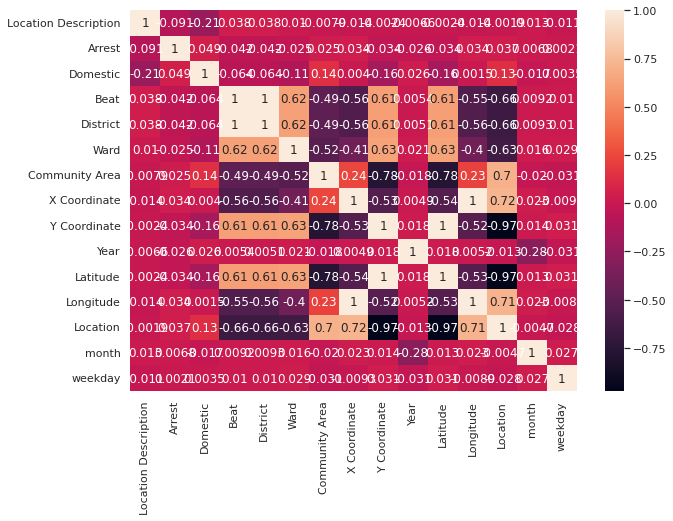

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(corelation,annot=True)

In [34]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude

selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']


In [35]:
X=cp_crime[selected_cols]
Y=cp_crime['crimeType']

In [36]:
Y=Y.astype(int)
Y.dtype

dtype('int64')

In [37]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')


Location Description:92
Arrest:2
Domestic:2
Beat:273
Ward:50
Community Area:77
Year:6
X Coordinate:5105
Y Coordinate:5290
Location:5448


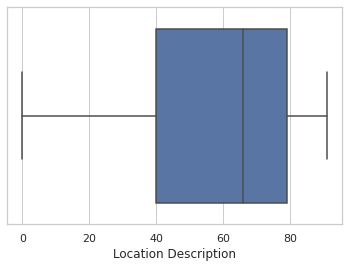

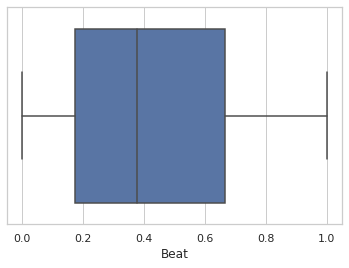

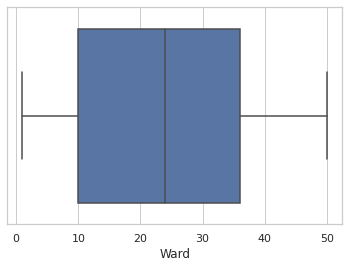

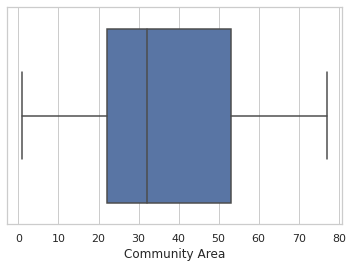

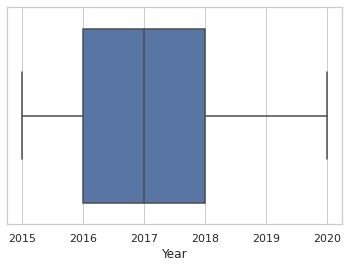

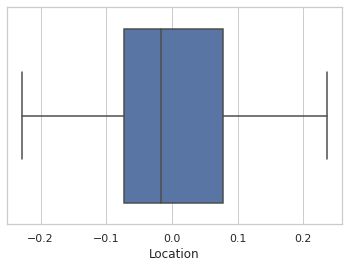

In [38]:
sns.set_theme(style="whitegrid")
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']      
sns.boxplot(x=cp_crime['Location Description'])
plt.show()
sns.boxplot(x=cp_crime['Beat'])
plt.show()
sns.boxplot(x=cp_crime['Ward'])
plt.show()
sns.boxplot(x=cp_crime['Community Area'])
plt.show()
sns.boxplot(x=cp_crime['Year'])
plt.show()
sns.boxplot(x=cp_crime['Location'])
plt.show()

In [39]:
#for xg boost

Y=Y.map({1:0,2:1,3:2,4:3})

In [40]:
# Tarining and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [41]:
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

In [42]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="saga", multi_class='ovr',max_iter=12000)
lr.fit(X_train, y_train)
print('Accuracy of Logistic Regression', lr.score(X_test, y_test))

Accuracy of Logistic Regression 0.49083333333333334


In [43]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Accuracy of Naive Bayes', gnb.score(X_test, y_test))

Accuracy of Naive Bayes 0.4866666666666667


In [44]:
# #  Categoric Naivee Bayes

# from sklearn.naive_bayes import CategoricalNB
# cnb = CategoricalNB()
# cnb.fit(X_train,y_train)
# print('Accuracy of Categoric Naive Byaes', cnb.score(X_test, y_test))    

In [45]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('Accuracy of KNN', knn.score(X_test, y_test))
pred_train = knn.predict(X_train)
pred_i = knn.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))

Accuracy of KNN 0.4825
Test accuracy  0.5683333333333334
Accuracy  0.4825


In [46]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [47]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [48]:
# Calculate the accuracy
import xgboost as xgb
xgb = xgb.XGBClassifier()
#xgb.set_params(n_estimators=10)
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train, y_train)
# Fit it to the training set


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [49]:
print(random_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [50]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [51]:
xgb=xgb.set_params(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=5,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0)
xgb.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.5258333333333334


In [52]:
print(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [53]:
y_train.unique()

array([0, 3, 1, 2])

In [54]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 300) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.5358333333333334


In [55]:
# # SVM

# from sklearn.svm import SVC
# svm = SVC(gamma='auto')
# svm.fit(X_train, y_train)
# print('Accuracy of SVM', svm.score(X_test, y_test))

In [56]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
y_pred = tree.fit(X_train, y_train).predict(X_test)

total_datapoints = X_test.shape[0]
mislabeled_datapoints = (y_test != y_pred).sum()
correct_datapoints = total_datapoints-mislabeled_datapoints
percent_correct = (correct_datapoints / total_datapoints) * 100

print("DecisionTreeClassifier results for NSL-KDD:\n")
print("Total datapoints: %d\nCorrect datapoints: %d\nMislabeled datapoints: %d\nPercent correct: %.2f%%"
      % (total_datapoints, correct_datapoints, mislabeled_datapoints, percent_correct))


DecisionTreeClassifier results for NSL-KDD:

Total datapoints: 1200
Correct datapoints: 526
Mislabeled datapoints: 674
Percent correct: 43.83%


In [57]:
# Decision Tree Classifier (J48)

from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1000)


j48 = DecisionTreeClassifier(criterion = "gini",random_state = 1000,max_depth=500, min_samples_leaf=600)
j48.fit(X_train, y_train)
print(j48)
             
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1000,max_depth = 500, min_samples_leaf = 600)
clf_entropy.fit(X_train, y_train)
print(clf_entropy)
             
y_pred = j48.predict(X_test)
# print("Predicted values:")
# print(y_pred)
             
# print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print ("Accuracy : ",accuracy_score(y_test,y_pred))
# print("Report : ",classification_report(y_test, y_pred))

             

DecisionTreeClassifier(max_depth=500, min_samples_leaf=600, random_state=1000)
DecisionTreeClassifier(criterion='entropy', max_depth=500, min_samples_leaf=600,
                       random_state=1000)
Accuracy :  0.5341666666666667


In [58]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
adb = AdaBoostClassifier(n_estimators=300,  learning_rate=1)
# Train Adaboost Classifer
model = adb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5458333333333333


In [59]:
# Using Cross Validation
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

In [60]:
# # XG Boost

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(xgb,X_train, y_train,cv=10)
# score
# print('XG boost Using Cross Validation: ',score.mean())

In [61]:
# # Logistic Regression

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(lr,X_train, y_train,cv=10)
# score
# print('Logistic Regression boost Using Cross Validation: ',score.mean())

In [62]:
# # Naive Bayes

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(gnb,X_train, y_train,cv=10)
# score
# print('Naive Bayes Using Cross Validation: ',score.mean())

In [63]:
# # Categoric Naive Bayes

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(cnb,X_train, y_train,cv=10)
# score
# print('Categoric Naive Bayes Using Cross Validation: ',score.mean())

In [64]:
# # KNN

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(knn,X_train, y_train,cv=10)
# score
# print('KNN Using Cross Validation: ',score.mean())

In [65]:
# # Random Forest

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(clf,X_train, y_train,cv=10)
# score
# print('Random Forest Using Cross Validation: ',score.mean())

In [66]:
# # SVM

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(svm,X_train, y_train,cv=10)
# score
# print('Random Forest Using Cross Validation: ',score.mean())

In [67]:
# # Decision Tree

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(tree,X_train, y_train,cv=10)
# score
# print('Decision Using Cross Validation: ',score.mean())

In [68]:
# # Decision Tree Classifier (J48)

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(j48,X_train, y_train,cv=10)
# score
# print('J46 Using Cross Validation: ',score.mean())

In [69]:
# # Ada Boost

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(adb,X_train, y_train,cv=10)
# score
# print('Ada BoostUsing Cross Validation: ',score.mean())